In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
class StochasticProcess:
  
  def time_step(self):
    dW = np.random.normal(0,math.sqrt(self.delta_t))
    dS = (self.drift * self.current_asset_price * self.delta_t) + (self.volatility * self.current_asset_price * dW)
    self.asset_prices.append(self.current_asset_price + dS)
    self.current_asset_price = self.current_asset_price + dS  

  def __init__(self, initial_asset_price, drift,delta_t, volatility ):
    self.drift = drift
    self.volatility = volatility
    self.delta_t = delta_t
    self.current_asset_price = initial_asset_price
    self.asset_prices = [initial_asset_price]

In [ ]:
processes = []
for i in range(0,100):
  processes.append(StochasticProcess(295, 0, 1/365,1.0625))

for process in processes:
  tte = 1
  while((tte - process.delta_t) > 0):
    process.time_step()
    tte = tte - process.delta_t


print(processes[0].asset_prices)

[295, 292.04553692090747, 275.0809991199432, 294.80385566823946, 292.2139264727179, 307.5854109289892, 280.1392200023483, 296.9512582937545, 280.7368189604368, 274.0672577007341, 259.7450156978496, 237.03228529783033, 231.0200706469123, 228.97507433391655, 272.5490093090798, 297.8439182475737, 285.46541984208005, 286.1096639525925, 282.08485905203634, 287.2090828115981, 305.05714143951434, 338.38470058191007, 344.5830792506217, 354.32408740327827, 372.44991475629917, 394.05189140134104, 366.0232948006601, 376.1322422972639, 352.98152491595584, 323.4947988833744, 353.25017509076105, 306.49278648103177, 287.347265796699, 276.25223806851045, 274.4462171753937, 277.6966009795986, 280.3565186304946, 288.9553093977696, 263.6035613919705, 285.2696721240623, 274.50378016949713, 262.5060778698672, 271.3307009480466, 251.1726426020838, 280.4500530300098, 269.28645088216734, 248.33080900860884, 246.20817679469715, 236.52162646907976, 243.50080673324757, 233.63548213010785, 248.58222324377817, 259

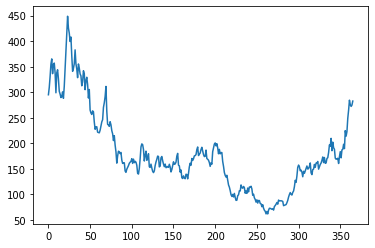

In [ ]:
x = plt.plot(np.arange(0, len(processes[0].asset_prices)), processes[5].asset_prices)
plt.show()

In [ ]:
class Call:

  def __init__(self, strike):
    self.strike = strike

#Initialise Instrument, In this case a Vanilla Call with Strike Price only.

class EuroCallSim:
  def __init__(self, Call,n_options, initial_asset_price, drift, delta_t, volatility,tte,rfr):
    stochastic_processes = []
    
    for i in range(0,n_options):
      stochastic_processes.append(StochasticProcess(initial_asset_price, drift, delta_t, volatility))
    #Initialise Monte Carlo Simulations. n_options gives total number of generated Stochastic Processes.

    for stochastic_process in stochastic_processes:       #Iterating through each Stochastic Process
      tte_left = tte   #TTE is Time to Expiry.

      while((tte_left - stochastic_process.delta_t) > 0):
        tte_left = tte_left - stochastic_process.delta_t  
        stochastic_process.time_step()                    #Generate GBM Time Steps for each Stochastic Process

    print(stochastic_processes[1].asset_prices)

    payoffs = []
    for stochastic_process in stochastic_processes:
      payoff = stochastic_process.asset_prices[len(stochastic_process.asset_prices) -1] - Call.strike  
      # Calculating PayOff by subtracting Final Asset Price of each Stochastic Simulation
      z = payoff if payoff > 0 else 0
      payoffs.append(z)
      # Calculating Average Pay Off.

    print(payoffs)
    self.price = np.mean(payoffs) * math.exp(-tte * rfr)
    #Discounting Final Payoff with Risk Free Rate



In [ ]:
print(EuroCallSim(Call(300), 10000, 295.48, 0 ,1/365, 1.0625, 36/365, 0.08).price)

[295.48, 297.8485689297542, 313.36961252444945, 285.5345021521339, 289.58255713573936, 262.397718955052, 276.1981500259309, 307.44332672851084, 288.91244392455553, 283.63207759101005, 270.5770374181163, 276.39062352653104, 291.0012357252459, 304.0319114261528, 290.5205628710154, 269.0076214677986, 246.7828630564699, 242.6125915840605, 211.6916586817658, 217.0932703211445, 216.56380207855162, 220.3499989912586, 223.86855257398884, 252.39670349700737, 246.8303490236336, 232.00787975506208, 223.3073655582379, 222.544218563098, 216.17524917784166, 206.34740490561123, 233.54777334098912, 216.93441241185218, 201.47701101425793, 195.18169963994504, 186.50993785466986, 199.31267342185217]
[0, 0, 0, 3.9796279814309514, 87.24722642977525, 0, 163.3842342552058, 0, 161.98861598591083, 0, 0, 0, 9.636428635002744, 0, 0, 2.93191337446558, 0, 0, 0, 11.486777701947972, 0, 79.72898630031989, 0, 0, 0, 0, 103.92098149763024, 0, 0, 0, 0, 0, 164.15006084810233, 74.39738317738534, 52.88421582440736, 0, 141.8